# Explore US Bikeshare Data
In this notebook, we explore data related to bike share systems provided by [Motivate](https://motivateco.com/), a bike share system provider for many major cities in the United States, to uncover bike share usage patterns for three major cities in the United States: Chicago, New York City, and Washington.

Several functions are created to:
- Load the data.
- Filter data based on user input.
- Display different statistics.
- Display Visualizations.

Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create a dict for city files and lists for months and days that we'll use later

In [2]:
CITY_DATA = {'chicago': 'chicago.csv',
             'new york city': 'new_york_city.csv',
             'washington': 'washington.csv'}
months = ['january', 'february', 'march', 'april', 'may', 'june']
days = ['saturday', 'sunday', 'monday', 'tuesday', 'wednsday', 'thursday', 'friday']

Get city, month, day from user

In [3]:
def get_filters():
    
    print("Hello, let's explore some bikeshare data in the US!\nThe data we'll analyze is from 2017\n")
    
    city = input("Enter the city to explore its data: Chicago, New York City or Washington\n").lower()
    while city not in CITY_DATA:
        city = input("\nInvalid input.\nEnter a valid city from: Chicago, New York City or Washington\n")
    
    month = input("\nWhich month would you like to filter by?\nSelect any month from January to June or 'all' to analyze all the months\n").lower()
    while (month not in months) and month != 'all':
        month = input("\nEnter a valid month from January to June or 'all'\n").lower()
        
    day = input("\nWhich day would you like to filter by?\nSelect any day or 'all'\n").lower()
    while (day not in days) and day != 'all':
        day = input("\nEnter a valid day or 'all'\n").lower()
        
    print(f"\nThe following data is for the selected inputs:\n\nCity: {city.title()}\nMonth(s): {month.title()}\nDay(s): {day.title()}")
        
    return city, month, day

Load and filter dataset based on user inputs

In [4]:
def load_data(city, month, day):
    
    df = pd.read_csv(CITY_DATA[city])
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)
    
    #we'll change the start time to date time format and extract the month, day and hour
    
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()
    df['hour'] = df['Start Time'].dt.hour
    
    #now we have the df loaded correctly, we need to filter by the input month
    #the user can enter a month name or 'all', if they choose all, we don't need to filter
    
    if month != 'all':
        # when we extract the month using .dt, it will be the month number, so we need to index the months
        months = ['january', 'february', 'march', 'april', 'may', 'june'] 
        df = df[df['month'] == months.index(month) + 1]
        
    df_month = df.copy() #we store a version of the df filtered by month only for the plots of day frequency
    
    if day != 'all':
        # the days are named, so need to create a lista and index them
        df = df[df['day_of_week'] == day.title()] # we title the day to match the day_of_week format, which is titled.
        
    return(df, df_month)

Calculate time stats

In [5]:
def time_stats(df, month, day):
    
    print('\nCalculating the most and least frequent times of travel...\n')
    #most common month
    if month == 'all':
        most_common_month = months[df['month'].mode()[0] - 1].title()
        least_common_month = months[df['month'].value_counts().idxmin() - 1].title()
        print(f"Most common month of travel: {most_common_month}")
        print(f"Least common month of travel: {least_common_month}\n")
    
    #most common day
    if day == 'all':
        most_common_day = df['day_of_week'].mode()[0]
        least_common_day = df['day_of_week'].value_counts().idxmin()
        print(f"Most common day of travel: {most_common_day}")
        print(f"Least common day of travel: {least_common_day}\n")
        
    
    #the most common hour
    most_common_hour = df['hour'].mode()[0]
    least_common_hour = df['hour'].value_counts().idxmin()
    print(f"Most common hour of travel: {most_common_hour}")
    print(f"Least common hour of travel: {least_common_hour}\n")
    
    

Calculate station stats

In [6]:
def station_stats(df):
    
    print('\nCalculating the most frequently travelled stations...\n')
    df['start_to_end'] = 'From ' + df['Start Station'] + ' to ' + df['End Station']
    
    most_common_start = df['Start Station'].mode()[0]
    print(f"Most frequent starting station: {most_common_start}")
    
    most_common_end = df['End Station'].mode()[0]
    print(f"Most frequent ending station: {most_common_end}")
    
    most_common_trip = df['start_to_end'].mode()[0]
    print(f"Most frequent trip: {most_common_trip}")

Calculate trip duration stats

In [7]:
def trip_duration_stats(df):
    
    print('\nCalculating Trip Duration...\n')
    
    total_travel_time = df['Trip Duration'].sum()
    seconds = total_travel_time
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
    print(f"Total travel time: {int(hour)}:{int(minutes)}:{int(seconds)}")
    
    average_travel_time = df['Trip Duration'].mean()
    seconds = average_travel_time
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
    print(f"Average travel time is {round(minutes, 0)}:{round(seconds, 0)}")

Calculate user stats

In [8]:
def user_stats(df):
    
    print('\nCalculating User Stats...\n')
    
    user_types = df['User Type'].value_counts()
    print(f"User types:\n{user_types.to_string()}")
    
    try:
        gender_count = df['Gender'].value_counts()
        print(f"\nUser gender count:\n{gender_count.to_string()}\n")
    except:
        print("The gender is not available in this city\n")
        
    try:
        earliest_year = int(df['Birth Year'].min())
        recent_year = int(df['Birth Year'].max())
        common_year = int(df['Birth Year'].mode()[0])
        
        print(f"Earliest birth year: {earliest_year}\n")
        print(f"Most recent birth year: {recent_year}\n")
        print(f"Most common birth year: {common_year}\n")
    except:
        print("The birth year is not available in this city\n")

Display sample data

In [9]:
def raw_data(df):
    """Promts the user no enter an answer(yes/no) and displays 5 random rows of data if the user enters (yes)"""
    
    answer = input("Would you like to see 5 lines of raw data? (yes/no)\n").lower()
    
    while answer == 'yes':
        print(df.sample(n=5))
        answer = input("Would you like to see another 5 lines of raw data? (yes/no)\n").lower()
    

Plot travel frequency by day

In [10]:
def plot_day(df, city, month):
    
    plt.figure(figsize=(8, 5))
    plt.xlabel('Day')
    #plt.ylabel('Frequency')
    
    title = month.title() if month != 'all' else 'All Year Round'
    plt.title(f'Travel Frequency by Day in {city.title()}\n{title}')
    
    sns.countplot(x=df.day_of_week, order=df.day_of_week.value_counts().index)    
    plt.show()

Plot travel frequency by hour

In [11]:
def plot_hour(df, city, month, day):
    
    plt.figure(figsize=(8, 5))
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    
    month_plot = month.title() if month != 'all' else 'All Months'
    day_plot = day.title() if day != 'all' else 'All Days'
    
    plt.title(f'Travel Frequency by Hour in {city.title()}\n{month_plot}, {day_plot}')
    
    sns.barplot(x=df.hour.value_counts().index, y=df.hour.value_counts().values)
    plt.show()

Main loop

In [12]:
def main():
    while True:
        city, month, day = get_filters()
        df, df_month = load_data(city, month, day)

        time_stats(df, month, day)
        
        plot_day(df_month, city, month)
        plot_hour(df, city, month, day)
        
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        raw_data(df)

        restart = input('\nWould you like to restart? Enter yes or no\n')
        if restart.lower() != 'yes':
            break
        print('\n')


Hello, let's explore some bikeshare data in the US!
The data we'll analyze is from 2017

Enter the city to explore its data: Chicago, New York City or Washington
chicago

Which month would you like to filter by?
Select any month from January to June or 'all' to analyze all the months
february

Which day would you like to filter by?
Select any day or 'all'
all

The following data is for the selected inputs:

City: Chicago
Month(s): February
Day(s): All

Calculating the most and least frequent times of travel...

Most common day of travel: Monday
Least common day of travel: Thursday

Most common hour of travel: 17
Least common hour of travel: 3



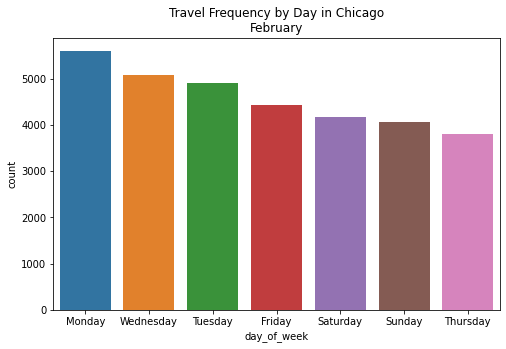

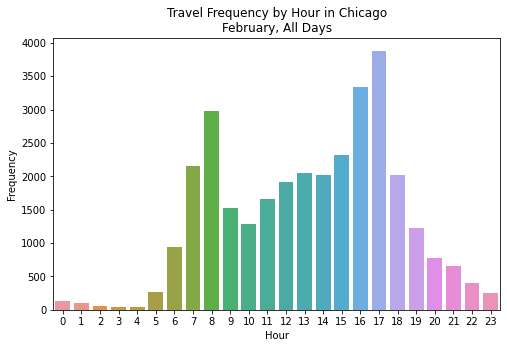


Calculating the most frequently travelled stations...

Most frequent starting station: Clinton St & Washington Blvd
Most frequent ending station: Clinton St & Washington Blvd
Most frequent trip: From Streeter Dr & Grand Ave to Streeter Dr & Grand Ave

Calculating Trip Duration...

Total travel time: 15:57:4
Average travel time is 13.0:47.0

Calculating User Stats...

User types:
Subscriber    27556
Customer       4500
Dependent         1

User gender count:
Male      21437
Female     6119

Earliest birth year: 1899

Most recent birth year: 2001

Most common birth year: 1989

Would you like to see 5 lines of raw data? (yes/no)
no

Would you like to restart? Enter yes or no
no


In [13]:
main()